# Mobile Price Prediction

In [ ]:
# !pip install mlxtend

# Importing modules

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score


from mlxtend.feature_selection import SequentialFeatureSelector

# Reading CSV & Basic Info

In [225]:
data0 = pd.read_csv("Cellphone.csv")
data1 = data0.copy()

In [226]:
data1.shape
print(data1.to_string(index=False))

 Product_id  Price  Sale  weight  resolution  ppi  cpu core  cpu freq  internal mem   ram  RearCam  Front_Cam  battery  thickness
        203   2357    10   135.0        5.20  424         8     1.350        16.000 3.000    13.00        8.0     2610        7.4
        880   1749    10   125.0        4.00  233         2     1.300         4.000 1.000     3.15        0.0     1700        9.9
         40   1916    10   110.0        4.70  312         4     1.200         8.000 1.500    13.00        5.0     2000        7.6
         99   1315    11   118.5        4.00  233         2     1.300         4.000 0.512     3.15        0.0     1400       11.0
        880   1749    11   125.0        4.00  233         2     1.300         4.000 1.000     3.15        0.0     1700        9.9
        947   2137    12   150.0        5.50  401         4     2.300        16.000 2.000    16.00        8.0     2500        9.5
        774   1238    13   134.1        4.00  233         2     1.200         8.000 1.000 

In [227]:
data1.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resolution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [228]:
data1.isna().sum().sum()

0

In [229]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resolution    161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


# Features

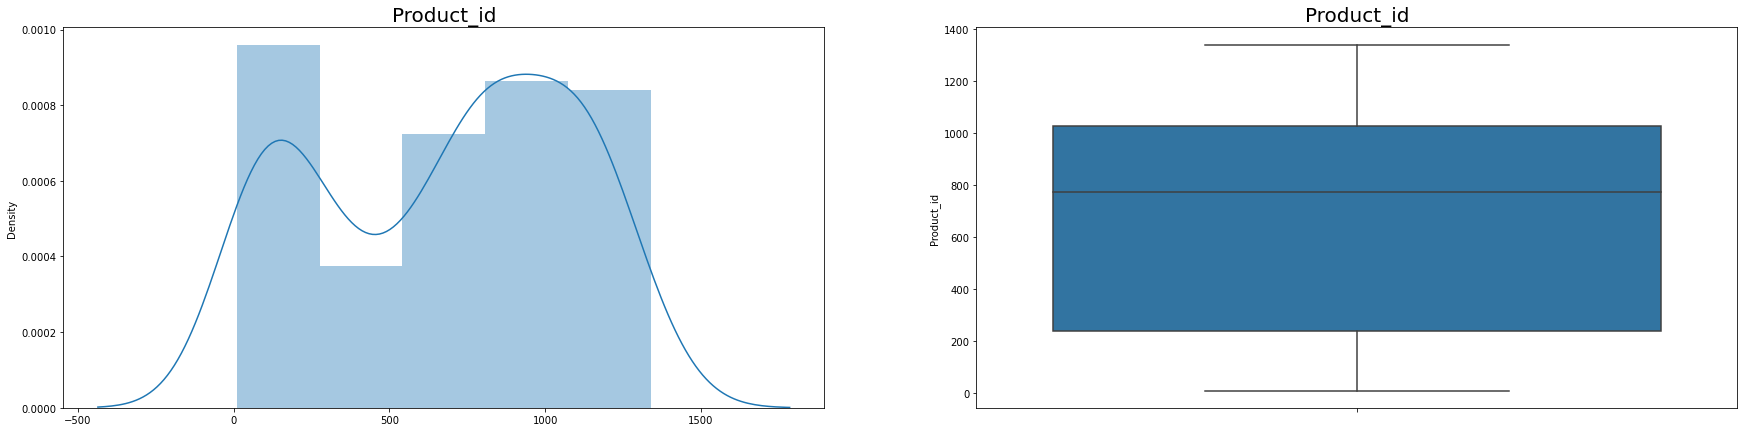

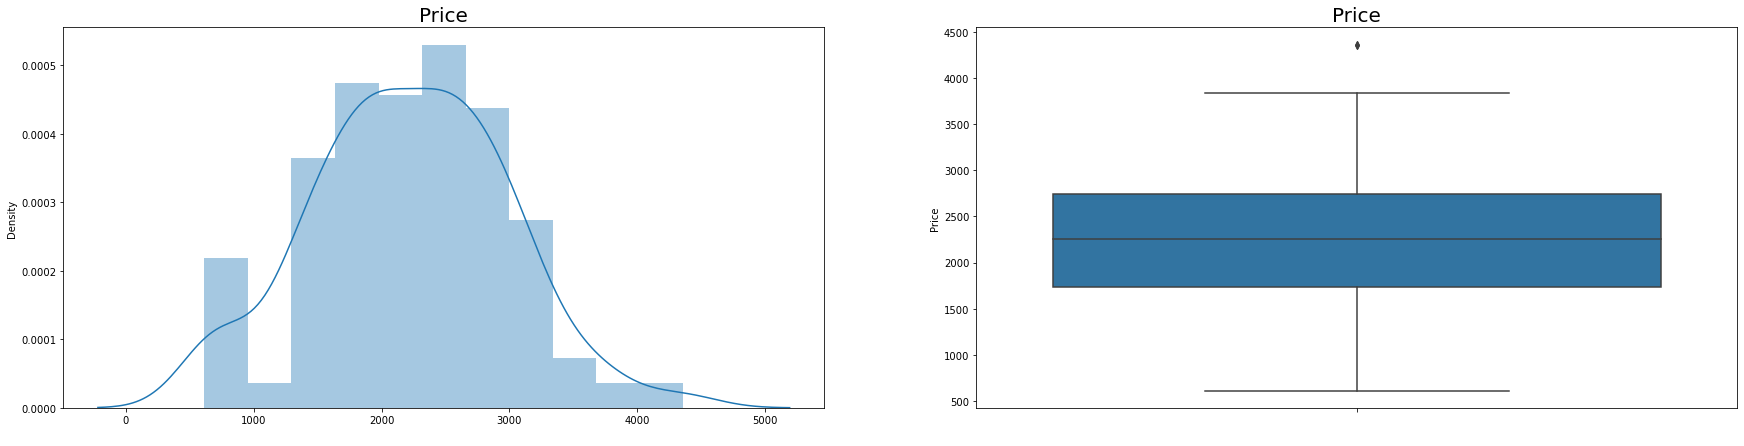

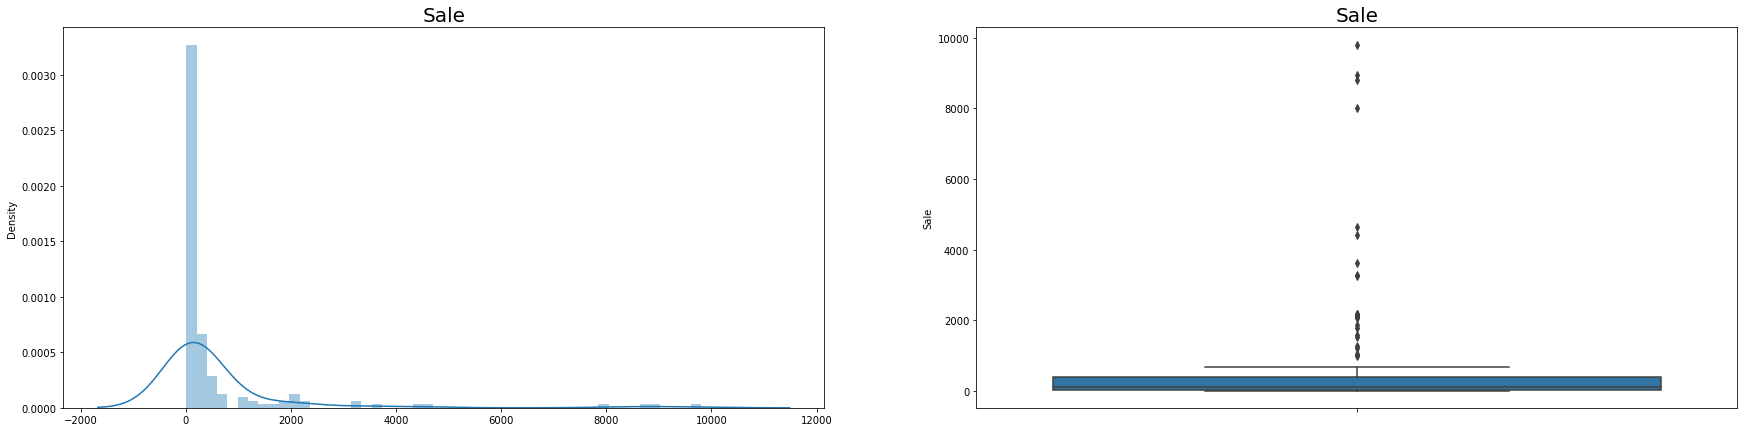

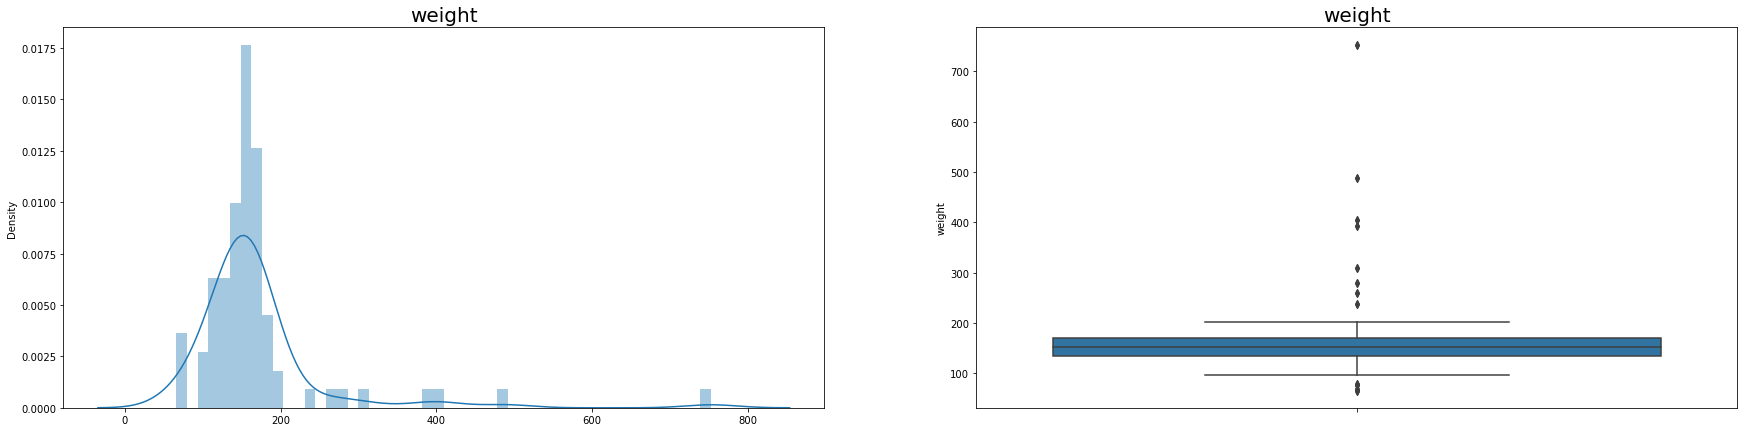

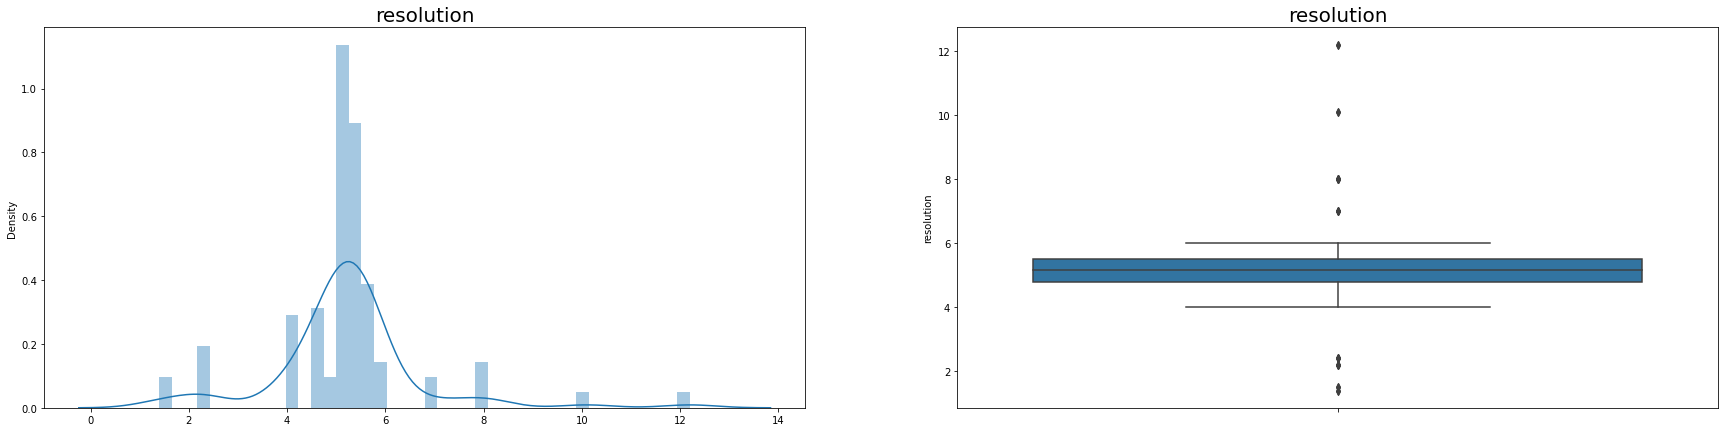

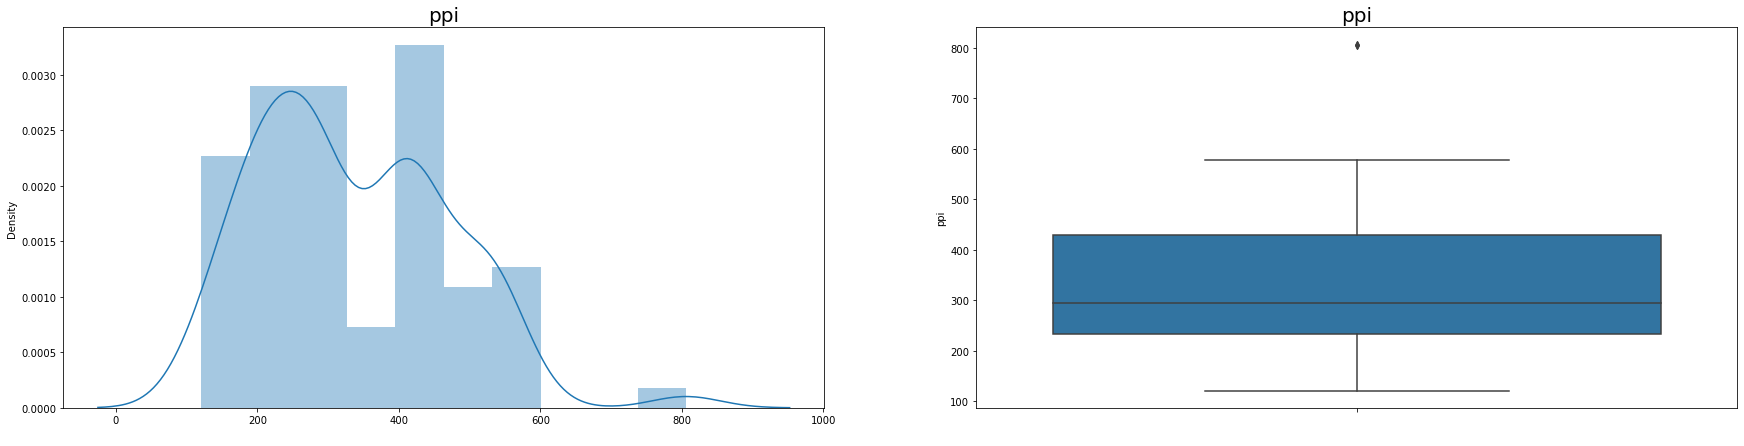

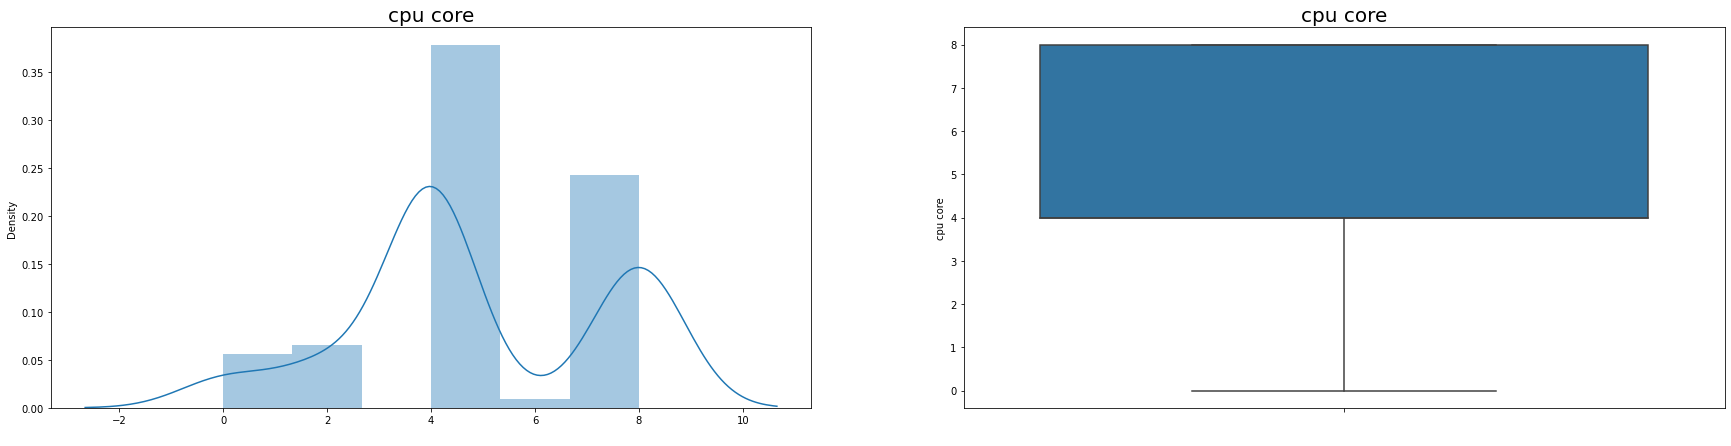

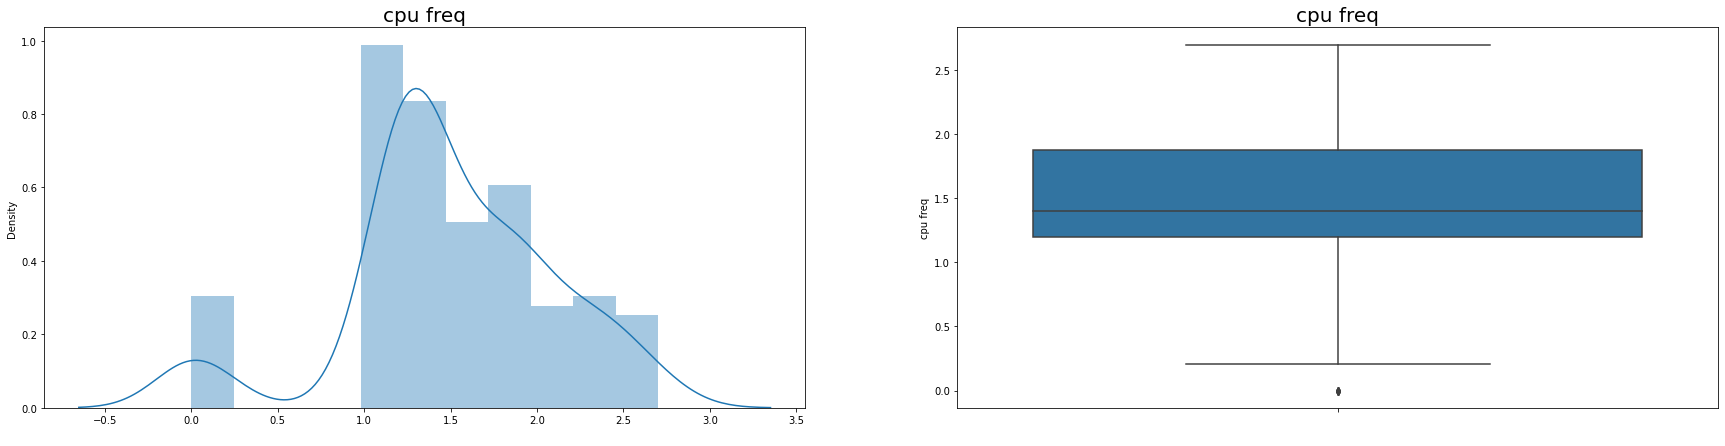

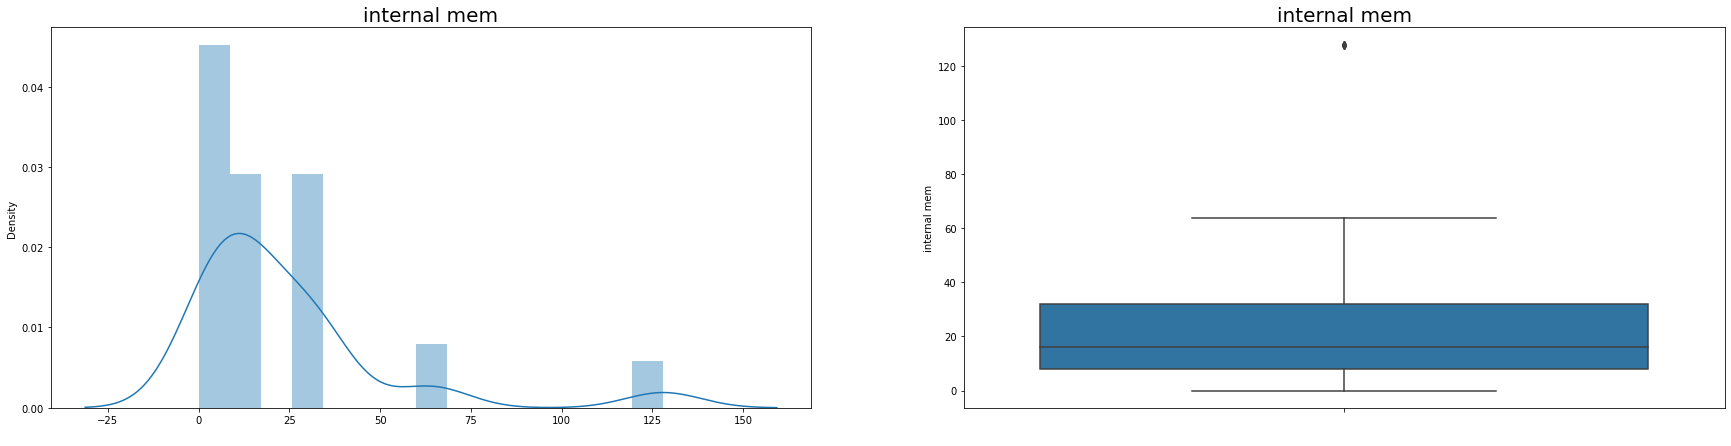

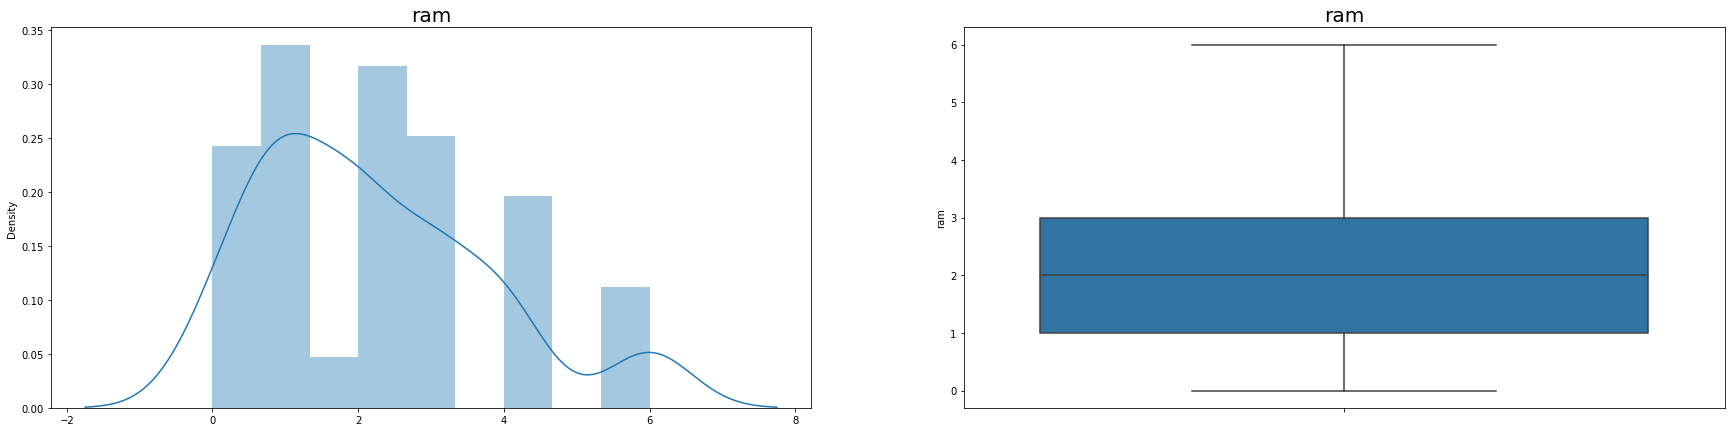

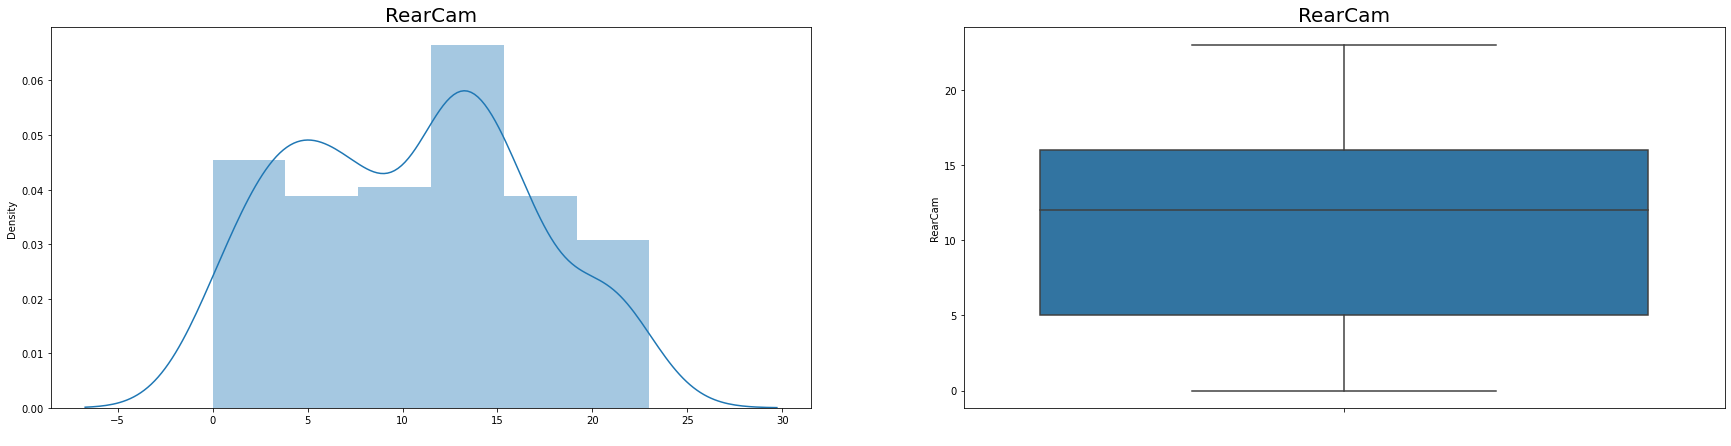

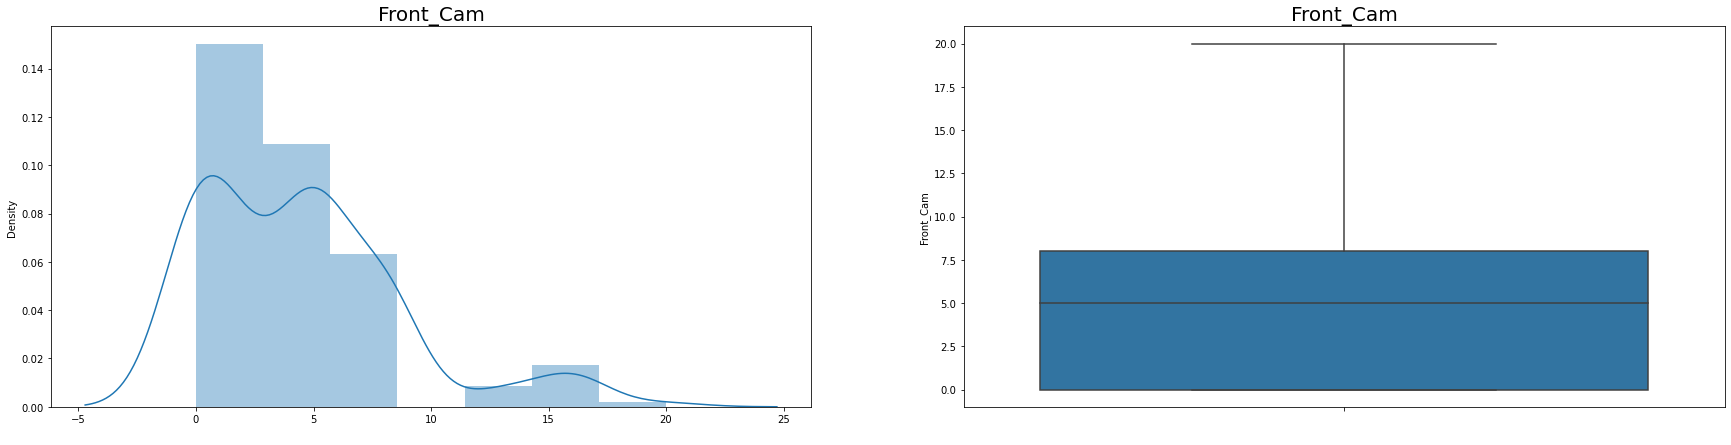

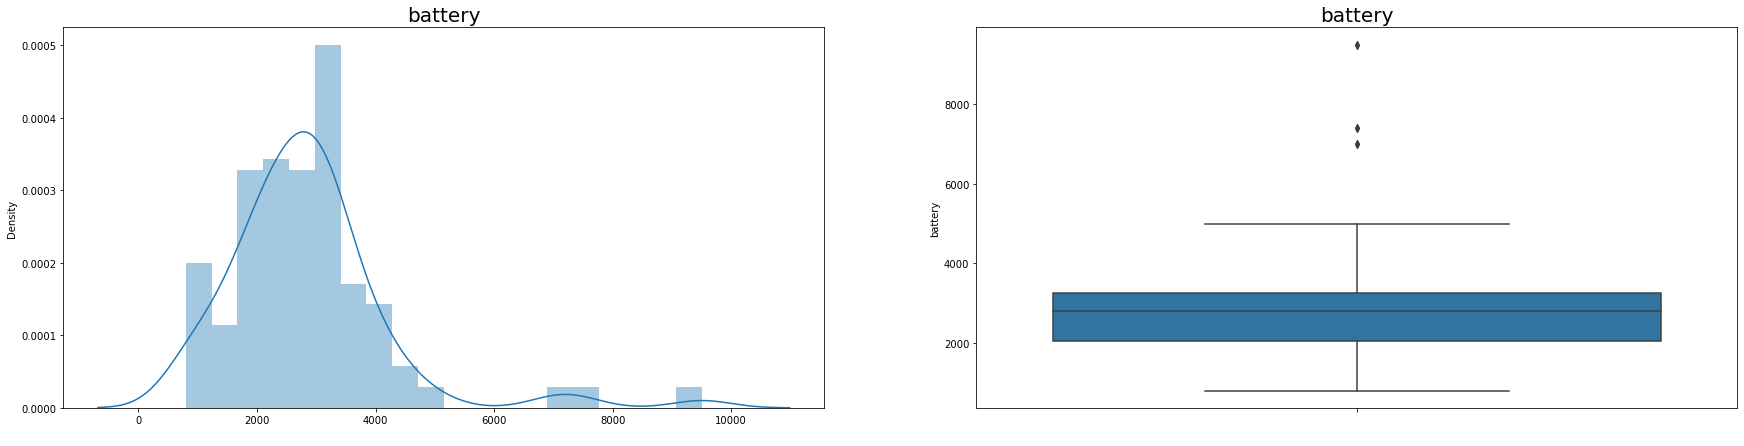

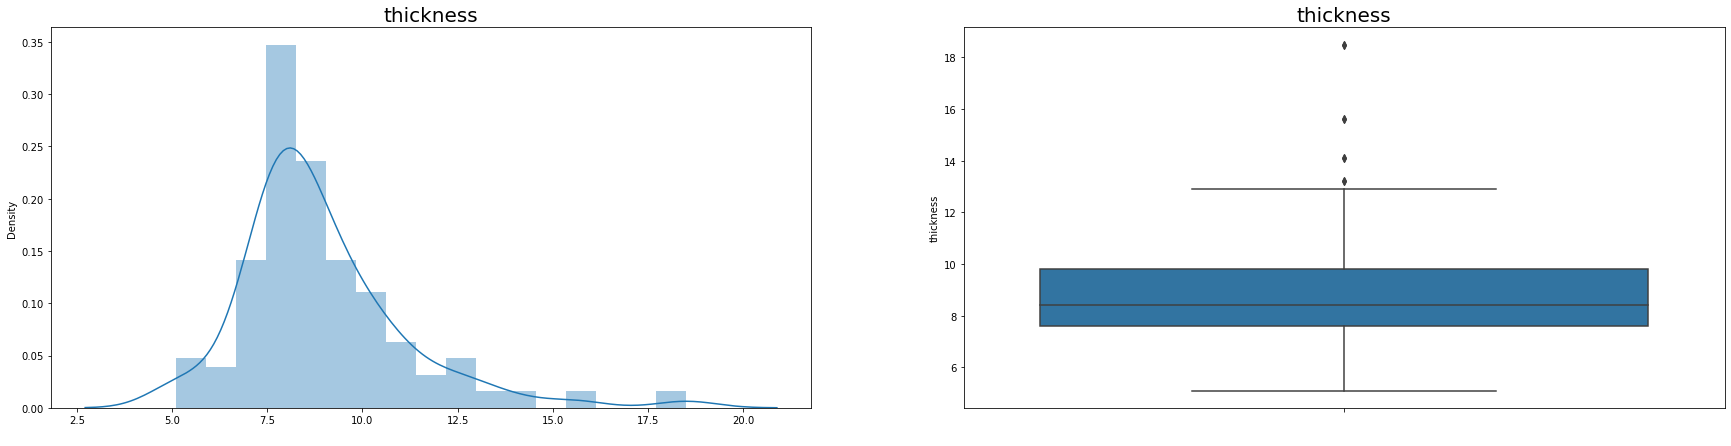

In [230]:
data1_columns = data1.columns
data1_columns

for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1) 
    sns.distplot(data1[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2) 
    sns.boxplot(y = data1[col])
    plt.title(col, size = 20)
    plt.show()

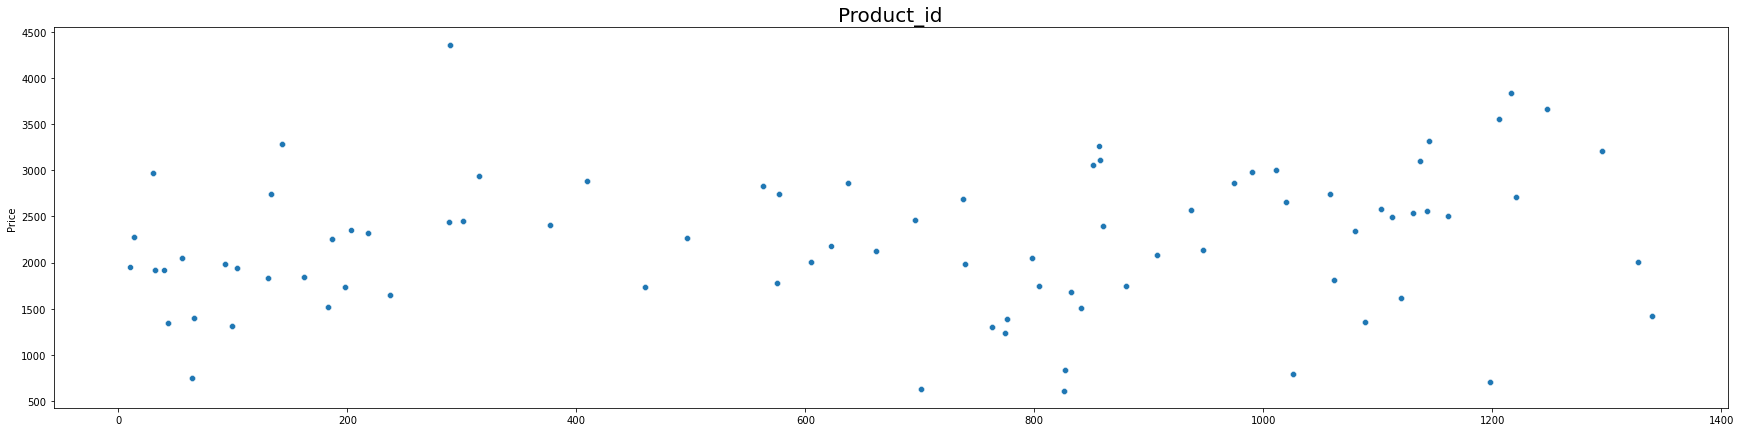

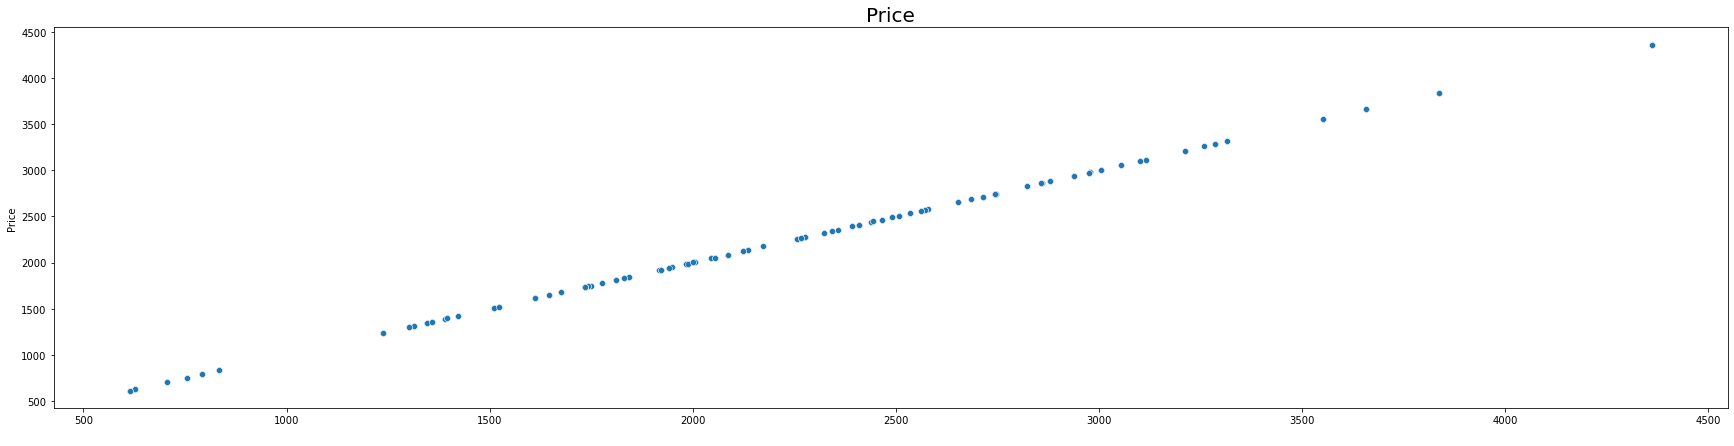

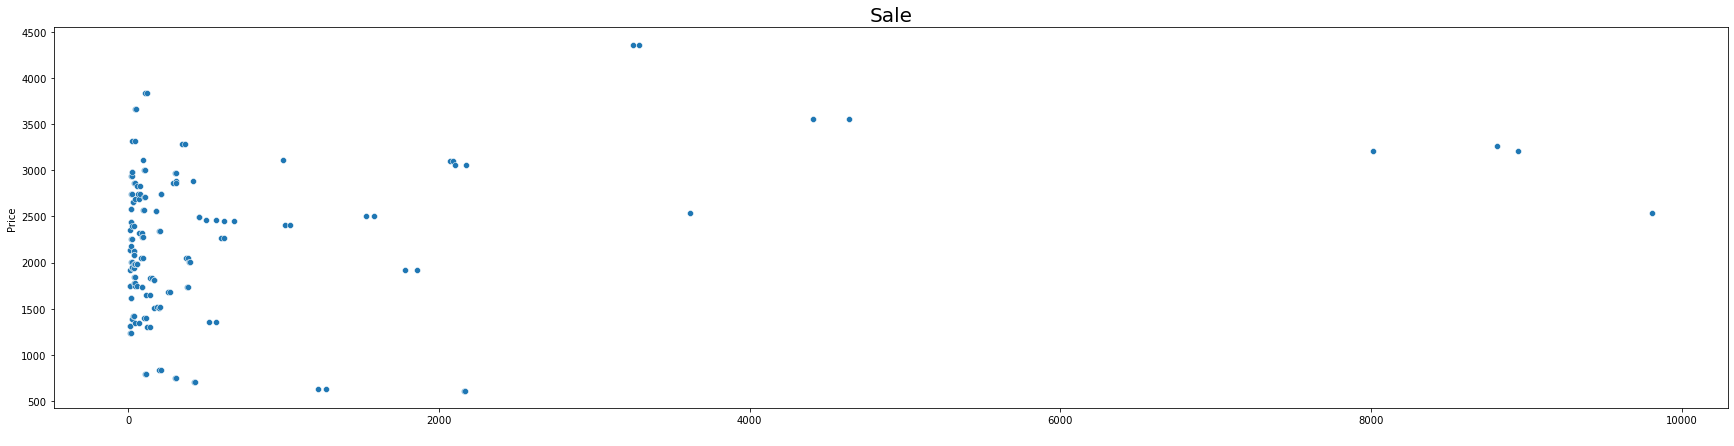

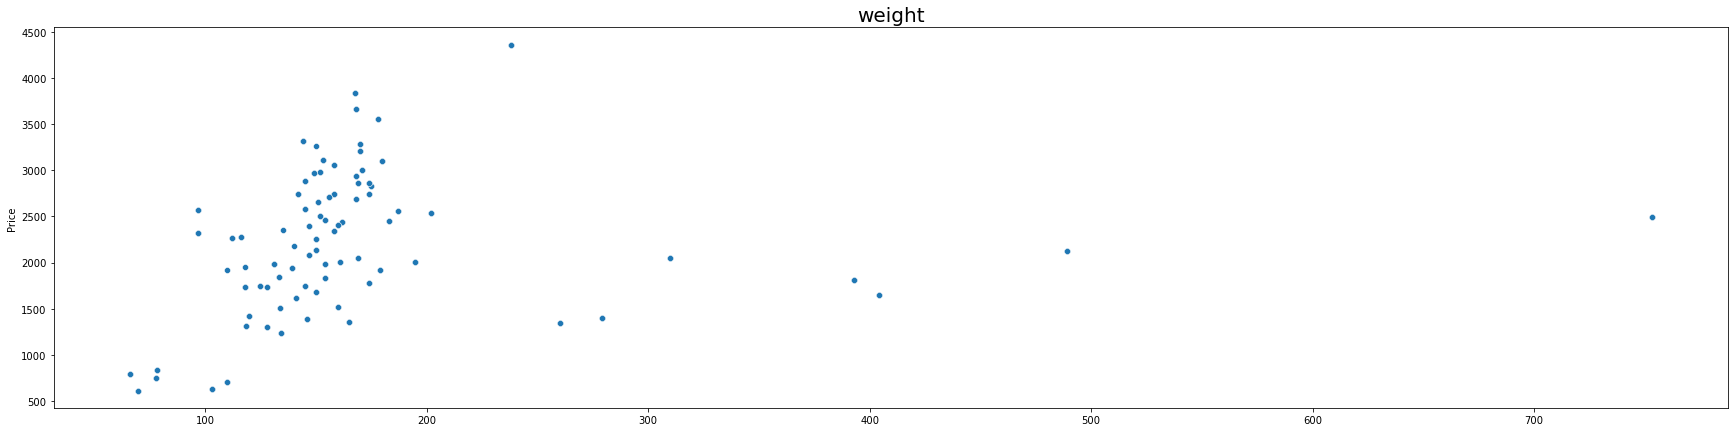

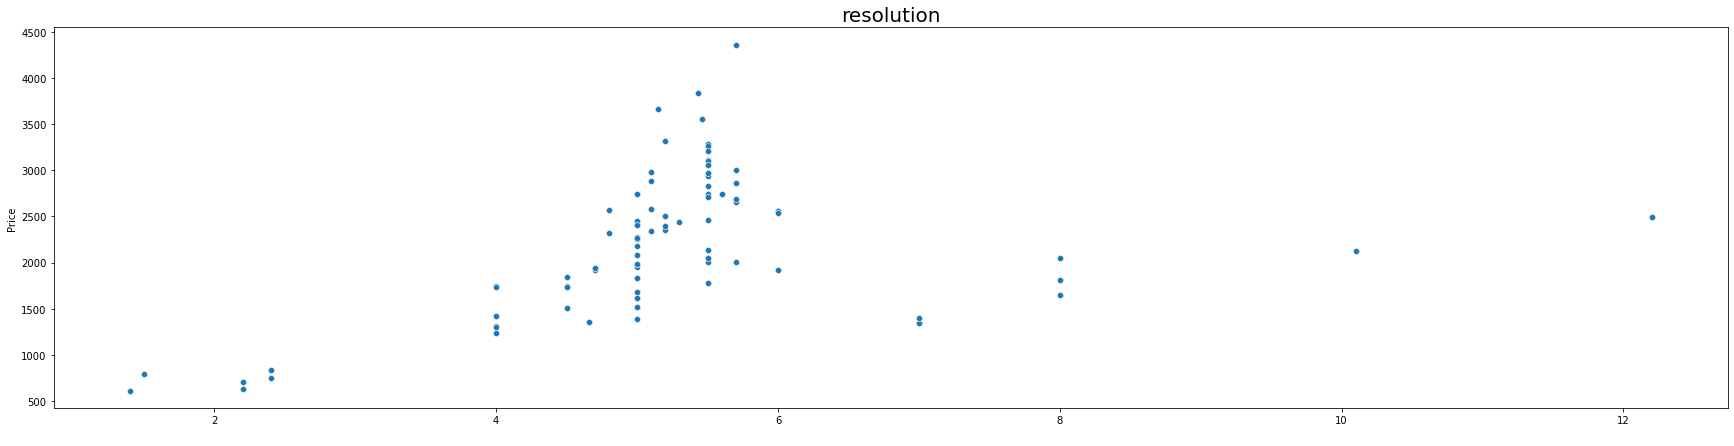

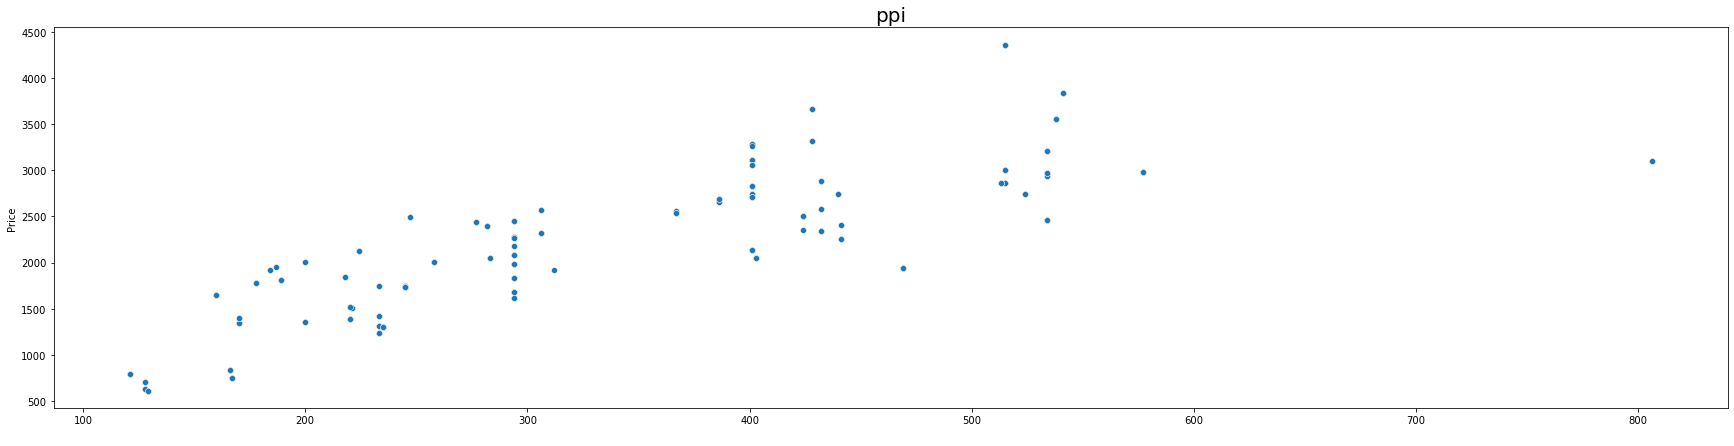

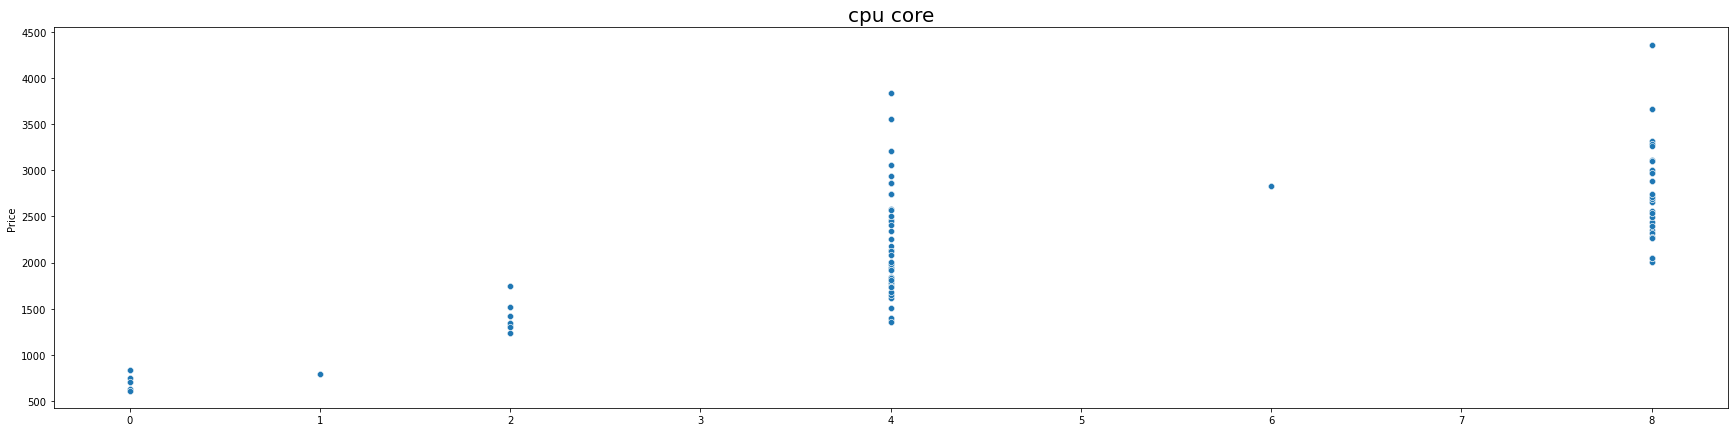

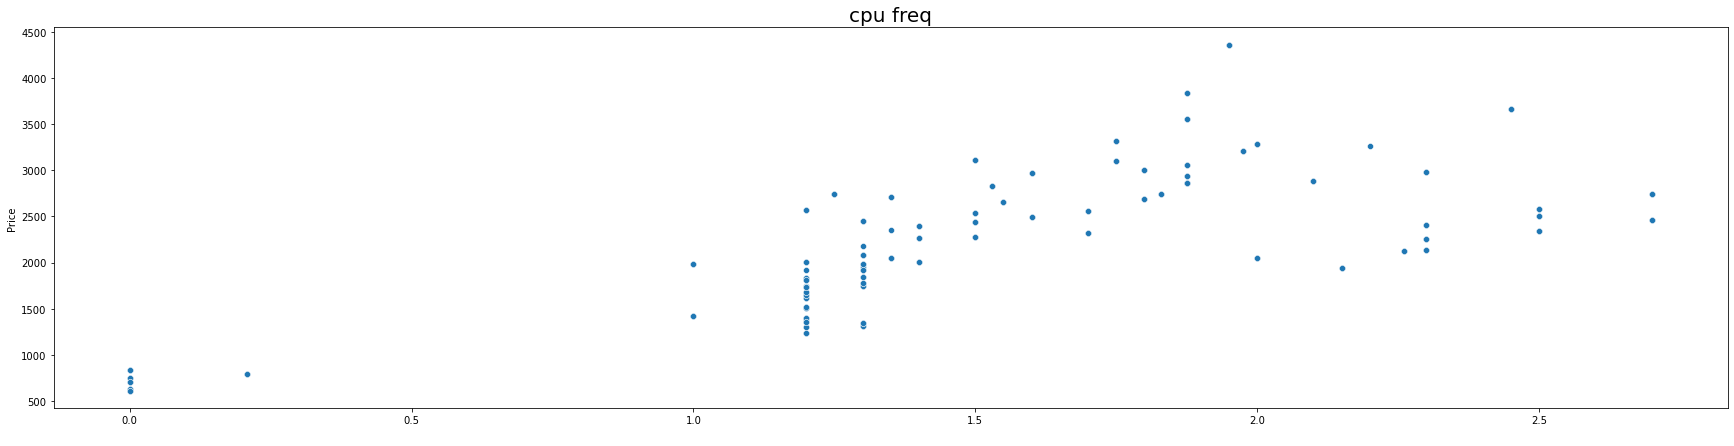

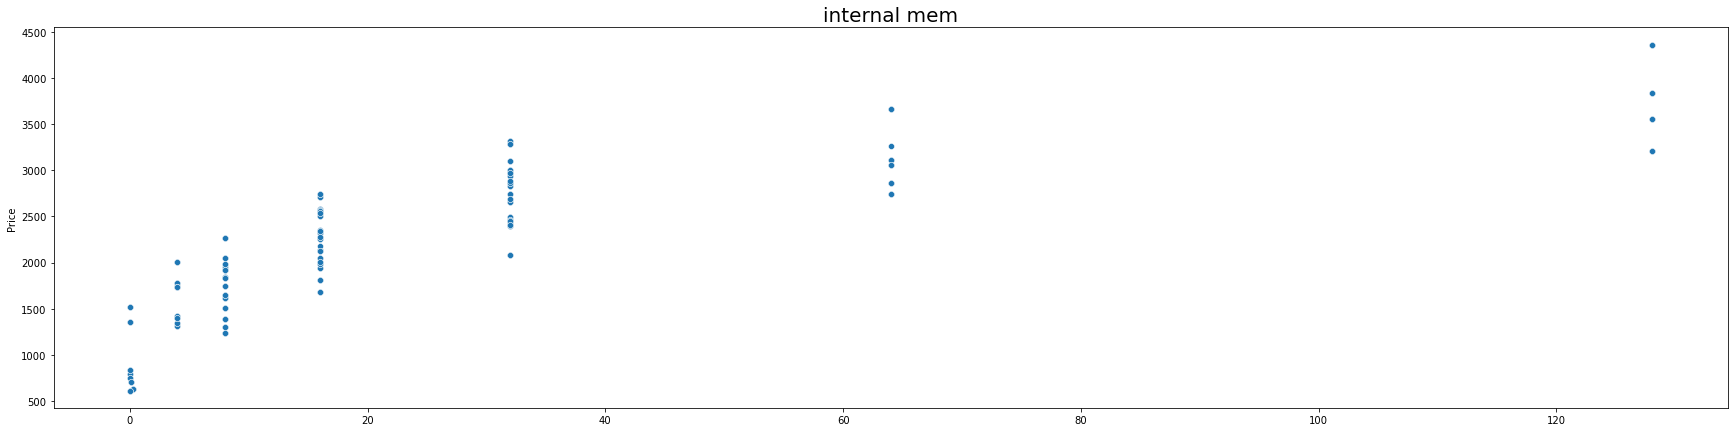

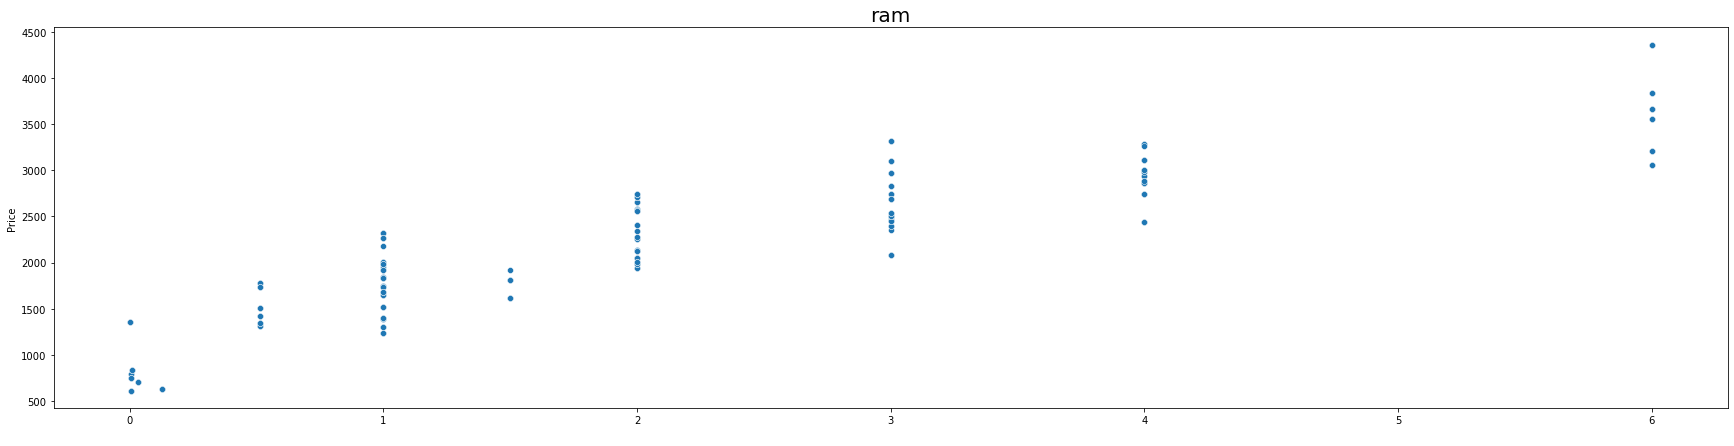

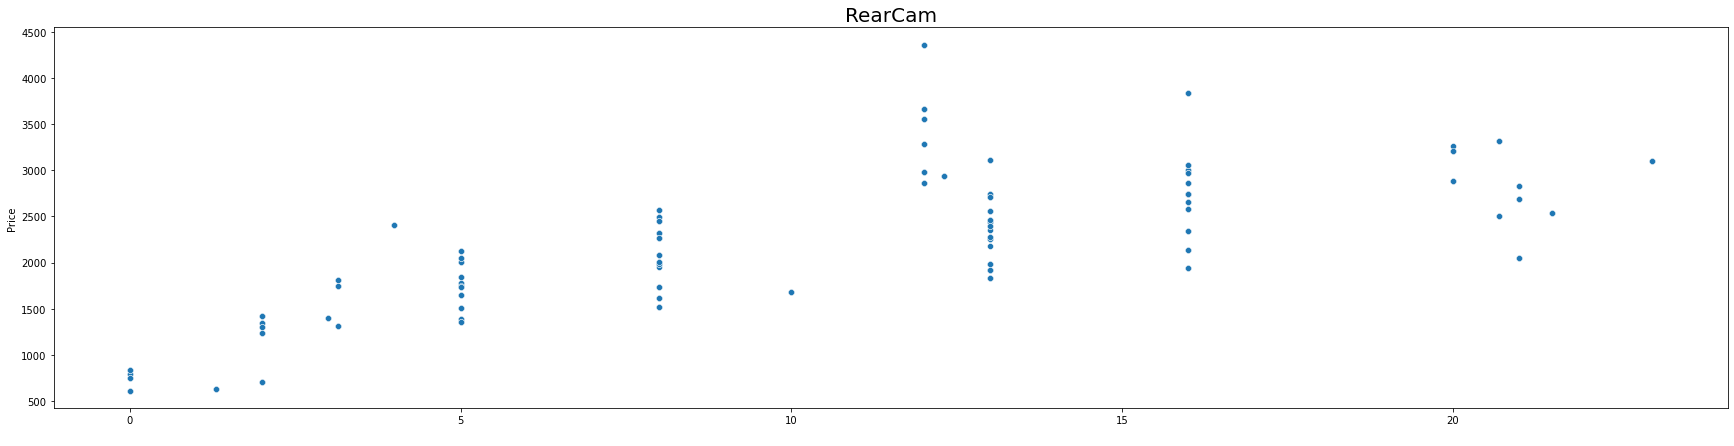

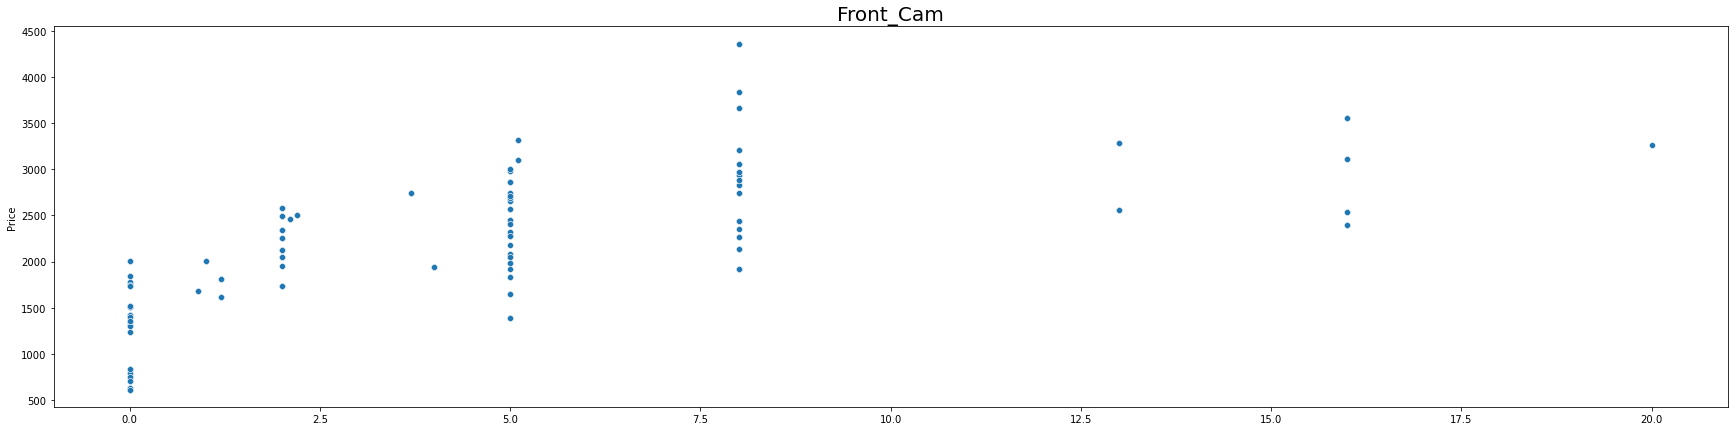

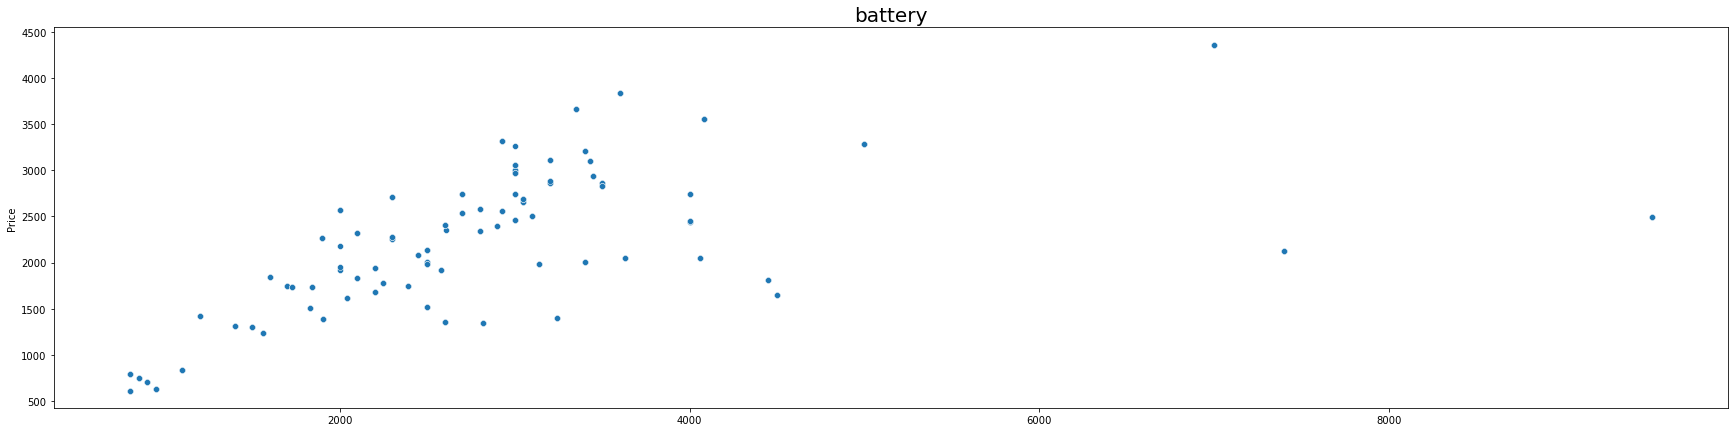

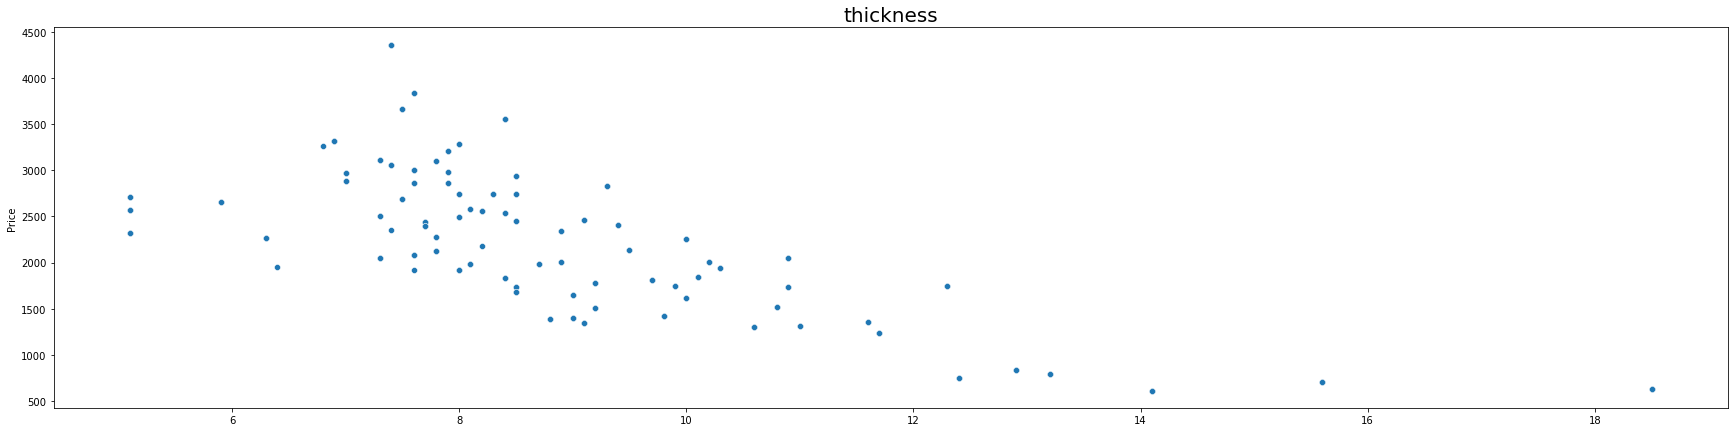

In [231]:
data1_target = data1["Price"]

for col in data1_columns:
    plt.figure(figsize = (30,7)) 
    sns.scatterplot(data = data1, x = col, y = data1_target) 
    plt.xlabel(" ") 
    plt.title(col,size = 20)
    plt.show()

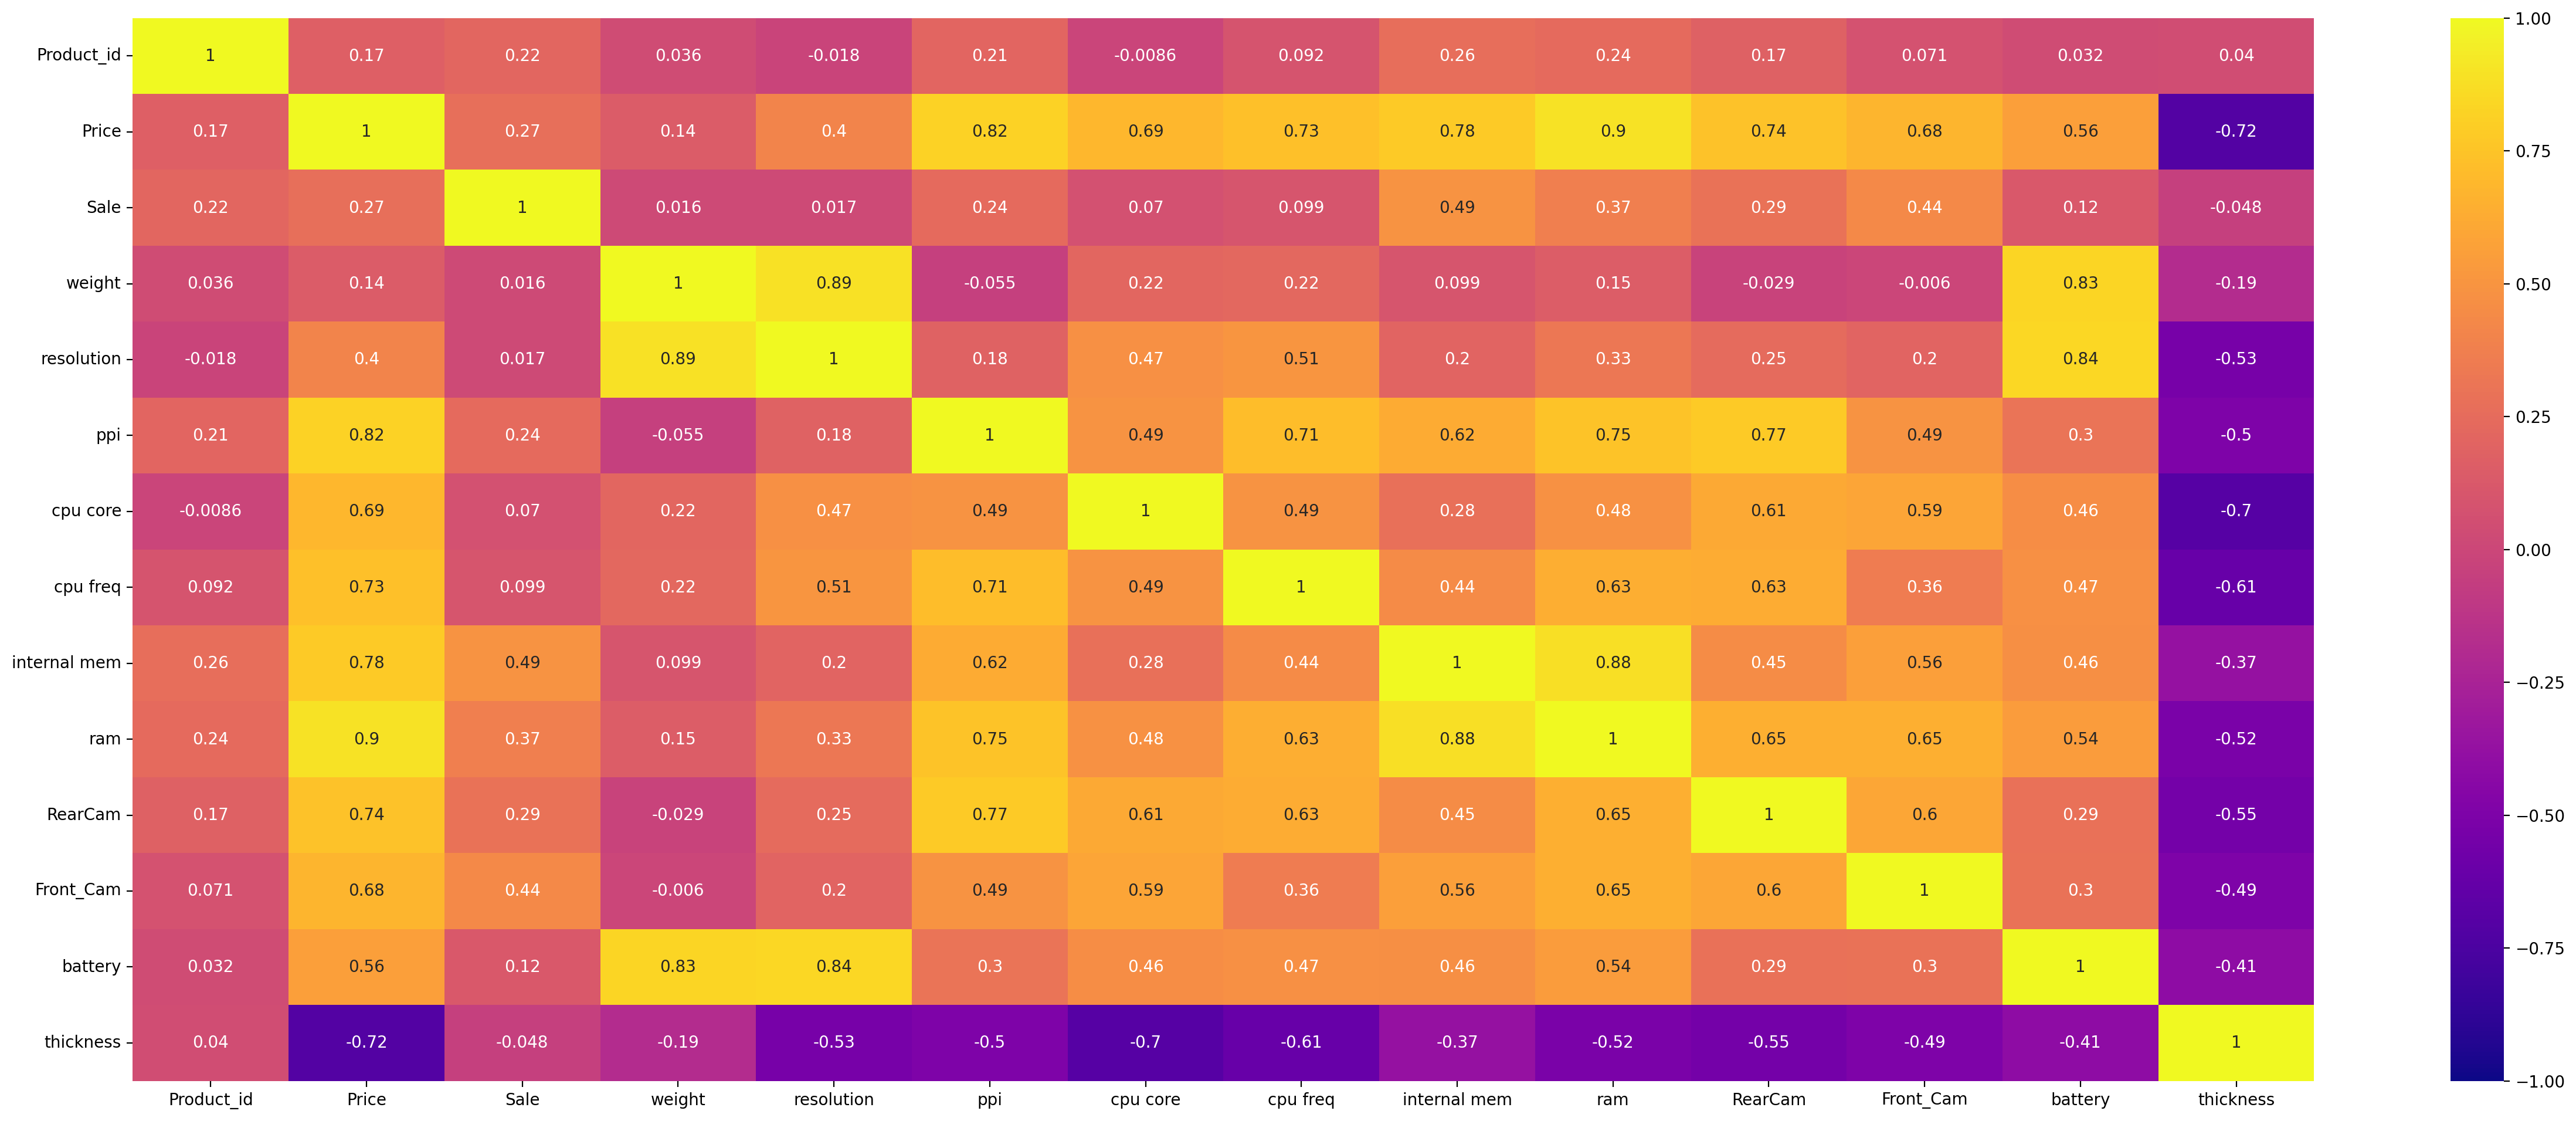

In [154]:
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(data1.corr(), annot = True, vmin = -1, vmax = +1, cmap = "plasma")
plt.show()

# Linear Regression Model with SK-Learn

In [232]:
X = data1.loc[:, data1.columns != "Price"] 
y = data1["Price"]

In [233]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test) 


print(f"r2_score is: {r2_score(y_test,y_pred)}") 
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}") 

r2_score is: 0.9073612979301641
RMSE is: 212.23552495606356


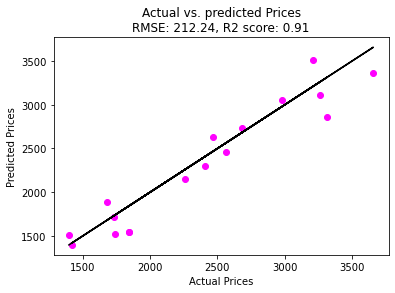

In [234]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='magenta')
ax.plot(y_test, y_test, color='black')
ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')
ax.set_title('Predicted Prices versus Actual Prices')
plt.title('Actual vs. predicted Prices\nRMSE: {:.2f}, R2 score: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred)), r2_score(y_test,y_pred)))
plt.show()

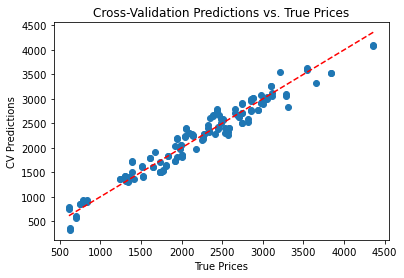

In [236]:
y_pred_cv = cross_val_predict(lr, X_train, y_train, cv=5)

plt.scatter(y_train, y_pred_cv)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.xlabel('True Prices')
plt.ylabel('CV Predictions')
plt.title('Cross-Validation Predictions vs. True Prices')
plt.show()


# Linear Regression Model without SK-Learn

In [302]:
import numpy as np
costs=[]
class Linear_Regression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

        for i in range(self.num_iterations):
  
            y_pred = np.dot(X, self.weights) + self.bias
            

            cost = (1 / (2*num_samples)) * np.sum(np.square(y_pred - y))
            costs.append(cost)

     
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)


            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
          

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [303]:
y_train=np.asarray(y_train)
y_train=y_train.reshape(-1,1)
print(y_train.shape)

(144, 1)


In [304]:
rg=Linear_Regression()
rg.fit(X_train, y_train)

In [305]:

for i in costs:
    print(i)

2709040.6215277775
2634550.868581323
2563612.454382272
2495947.821822518
2431305.710766137
2369458.5450822827
2310200.0820378154
2253343.297645354
2198718.4842212806
2146171.538799365
2095562.4231959581
2046763.7784563703
1999659.678151101
1954144.5065543365
1910121.9491435306
1867504.0841235593
1826210.564816276
1786167.8837791027
1747308.7104360696
1709571.2948319004
1672898.9308635748
1637239.473012781
1602544.9012042375
1568770.928955876
1535876.6504734152
1503824.222779362
1472578.5793599875
1442107.1721676441
1412379.7391340437
1383368.094636277
1355045.9406147362
1327388.69627354
1300373.344502224
1273978.293344646
1248183.2510094026
1222969.1130674472
1198317.8606187676
1174212.4683324243
1150636.821374372
1127575.6403365387
1105014.4133696859
1082939.33480271
1061337.2496030529
1040195.6030977169
1019502.3954326247
999246.1403004953
979415.8275145293
960000.8890476007
940991.1681947699
922376.8915512424
904148.6435287258
886297.3431608891
868814.2229735815
851690.8097179069
83

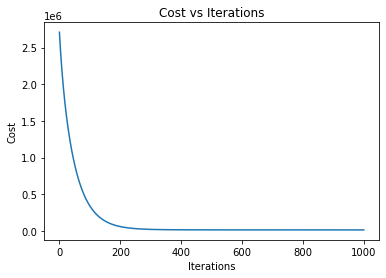

In [306]:
iterations = range(len(costs))
plt.plot(iterations, costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

In [307]:
y_pred=rg.predict(X_test)

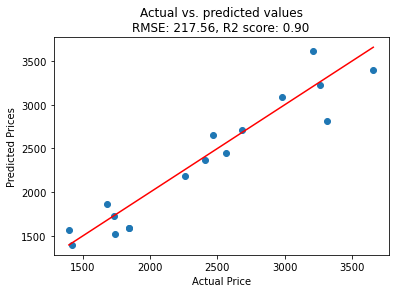

In [309]:
# plot the actual Prices vs. the predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs. predicted Prices')
plt.title('Actual vs. predicted values\nRMSE: {:.2f}, R2 score: {:.2f}'.format(rmse, r2score))

# add a diagonal line for perfect fit
x = np.linspace(min(y_test), max(y_test), 100)
y = x
plt.plot(x, y, color='red')

plt.show()


# The End 